# Configuring Axes

*Tyler Caraza-Harter*

In this reading, we'll learn about how to configure the axes on which we're plotting, as well as how to create multiple plot areas within the same matplotlib figure.

Let's do our boilerplate setup, then start by revisiting the Iris dataset introduced previously.

In [1]:
from pandas import Series, DataFrame
import pandas as pd

In [2]:
%matplotlib inline

In [3]:
import matplotlib
matplotlib.rcParams.update({'font.size': 15})

In [4]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',
                 names=['sepal-len', 'sepal-wid', 'petal-len', 'petal-wid', 'name'])
df.head()

,sepal-len,sepal-wid,petal-len,petal-wid,name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df.tail()

,sepal-len,sepal-wid,petal-len,petal-wid,name
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


Let's plot the petal dimensions of the Virginica variety.

In [6]:
df = df[df['name'] == 'Iris-virginica']
df.head()

,sepal-len,sepal-wid,petal-len,petal-wid,name
100,6.3,3.3,6.0,2.5,Iris-virginica
101,5.8,2.7,5.1,1.9,Iris-virginica
102,7.1,3.0,5.9,2.1,Iris-virginica
103,6.3,2.9,5.6,1.8,Iris-virginica
104,6.5,3.0,5.8,2.2,Iris-virginica


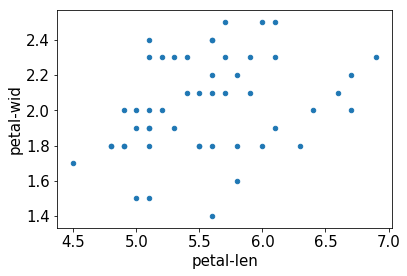

In [7]:
df.plot.scatter(x='petal-len', y='petal-wid')

**Problem**: it's very hard in the above plot to see any correlation between length and width.  This is because the plot origin is not at 0,0.  This makes the data look scattered over the whole area.  We can use `xlim=VAL` and `ylim=VAL` arguments to force the origin to be 0,0.

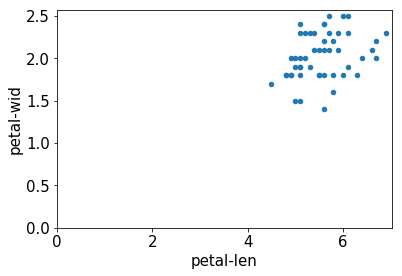

In [8]:
df.plot.scatter(x='petal-len', y='petal-wid', xlim=0, ylim=0)

This gives the reader a better perspective on the data, but one still need to nead the axis labels closely to determine whether the length or petal dimensions are greater.  When we want to make such comparisons, it makes sense to force the axes to cover the same range.  In this case, we can pass tuples for xlim and ylim instead, as `xlim=(start,end)` and `ylim=(start,end)`.

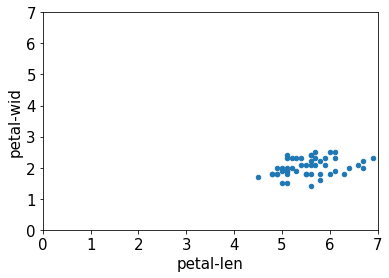

In [9]:
df.plot.scatter(x='petal-len', y='petal-wid', xlim=(0,7), ylim=(0,7))

But be careful!  It's very easy to miss data this way without realizing it.  For example, what happens if we have a 5x5 plot?

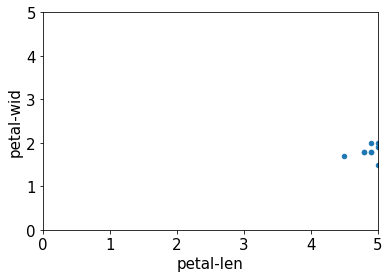

In [10]:
ax = df.plot.scatter(x='petal-len', y='petal-wid', xlim=(0,5), ylim=(0,5))

Unfortunately, there's no error!  We'll have to do our own checking to make sure we get a warning in such cases.

Notice we retrieved the ax object above.  We can use `ax.get_xlim()` and `ax.get_ylim()` to get tuple ranges and check against the data ranges with some asserts.  You may want to keep the following snippet handy and copy/paste it to check when you're plotting.

In [11]:
try:
    assert df[ax.get_xlabel()].min() >= ax.get_xlim()[0]
    assert df[ax.get_xlabel()].max() <= ax.get_xlim()[1]
    assert df[ax.get_ylabel()].min() >= ax.get_ylim()[0]
    assert df[ax.get_ylabel()].max() <= ax.get_ylim()[1]
except:
    print("WARNING!  Data out of range!\n" * 10)

WARNING!  Data out of range!
WARNING!  Data out of range!
WARNING!  Data out of range!
WARNING!  Data out of range!
WARNING!  Data out of range!
WARNING!  Data out of range!
WARNING!  Data out of range!
WARNING!  Data out of range!
WARNING!  Data out of range!
WARNING!  Data out of range!



Or, better, don't put a try/except around the asserts so that your notebook crashes rather than proceeding with a warning that you may (or may not) notice.

# Log Axis

Sometimes we want to plot very large and very small numbers in the same plot.  Here's an example.

In [12]:
s = Series([1,10,100,1000,10000,100000], index=[2010, 2011, 2012, 2013, 2014, 2015])
s

2010         1
2011        10
2012       100
2013      1000
2014     10000
2015    100000
dtype: int64

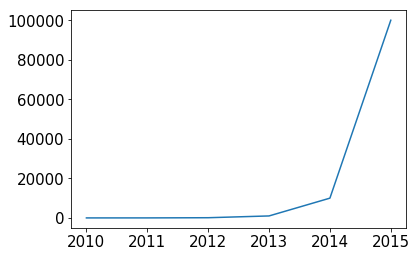

In [13]:
s.plot.line()

The problem with this plot is that the values from 2010 until 2013 look basically the same, even though the value at 2013 is 1000x greater than the value at 2010.  This is because relative to a plot like this that maxes out at 100 thousand, 1 and 1K are both approximately zero.

This is an example of a linear plot.  The difference between any two ticks is the same.  For example, the difference between the first two is 20K (20K - 0).  The different between the last two is also 20K (100K - 80K).

An alternative to a linear scale in a logarithmic scale.  Let's review logs now.  We'll focus on the intuition rather than the math.

You might remember that if `y == 10 ** n`, then `n == math.log10(y)`.

Let's take a look at the logs of a few examples.

In [14]:
import math

examples = []
n = 1
while n <= 1000000:
    examples.append({"n":n, "log(n)":math.log10(n)})
    n *= 10
    
# note that in the table, log(n) is base 10, whereas math.log in Python is base e
DataFrame(examples, columns=["n", "log(n)"])

,n,log(n)
0,1,0.0
1,10,1.0
2,100,2.0
3,1000,3.0
4,10000,4.0
5,100000,5.0
6,1000000,6.0


Notice a pattern?  For the numbers we chose, `log(n)` is the number of 0's in the number.  For example, `log(100)` is 2, because there are 2 zeros when we write the number.

Instead of the actual mathematical definition, let's go with an intuitive, approximate definition:

> log(n) is approximately the number of digits you need to write to express n

Now, this definition isn't perfect.  It doesn't make sense for decimal numbers (e.g., 3.14159).  And, of course, it's approximate.  One million (1000000) is 7 digits, but log(1000000) is 6.  But we can say this: for positive integers n, log(n) will be close to the number of digits it takes to write n (by "close", we mean that it is at most one off).

That's why logs make it easier to talk about big numbers.  For example, consider these:
> x = 152435624001
>
> y = 144432245562123

If we want to compare these large numbers, it's much to talk about the number of digits.  For example, we can talk about the approximate magnitudes by stating that "**x** is a 12-digit number and **y** is a 15-digit number".

If we use logs, we'll get numbers close to 12 and 15: "**log(x)** is 11.18 and **log(y)** is 14.15".

This makes a log scale great for communicating about both big and small numbers.  Relative to 1000000, 1 and 10 both look like approximately 0 on a linear scale.  But if I tell you that the biggest number takes 7-digits to writes, but there are also 1-digit and 2-digits numbers, you can realize that the small numbers do differ significantly, even though they are dwarfed by the large numbers.

We can easily use a log scale by passing `logy=True` to the `line` method.

In [15]:
s = Series([1,10,100,1000,10000,100000], index=[2010, 2011, 2012, 2013, 2014, 2015])
s

2010         1
2011        10
2012       100
2013      1000
2014     10000
2015    100000
dtype: int64

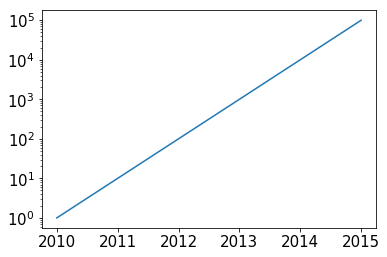

In [16]:
s.plot.line(logy=True)

In the above plot, for each major tick that we move up along the y-axis, the numbers we're writing would take about 1 more digit to express.

# Example: Stock Returns

Previously, we plotted how money grows over time if invested generally in the US stock market (as represented by the S&P 500).  Let's recreate that plot.

In [17]:
returns = pd.read_csv("sp500.csv").set_index("year")
returns.head()

,return
year,
1970,1.0401
1971,1.1431
1972,1.1898
1973,0.8534
1974,0.7353


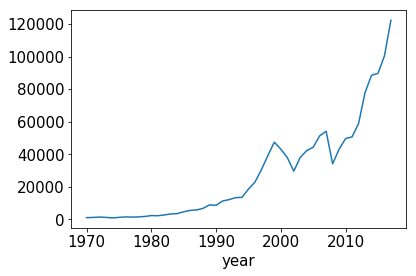

In [18]:
(1000 * returns['return'].cumprod()).plot.line()

The above plot indicates that if \$1000 was consistently invested in U.S. stocks from 1970 to present, it would be worth about $120K today.

The plot is also misleading.  It looks like returns were tiny from 1970 until 1990, and only started growing exponentially in recent years.  However, stocks were also growing exponentially in those early years as well.  It's just that \$1K and \$2K both look like nothing compared to \$120K, even though going from \$1K to \$2K is the same return as from \$10K to \$20K.  If we pass `logy=True`, a \$1K to \$2K jump will cover the same amount of vertical spaces as a \$10K to \$20K jump.

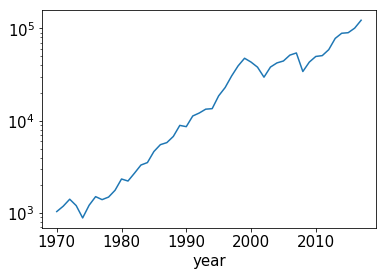

In [19]:
(1000 * returns['return'].cumprod()).plot.line(logy=True)

This plot shows the true steady long-term trend over the last 47 years.

# Multiple Plots per Figure

Remember that when calling a `df.plot.METHOD` plotting method, an axes object is returned.  We can also pass an `ax=AXES` argument to specify in what area to plot the data.  So far, we have seen two uses for this: (1) it let's us plot data from different DataFrames in the same are, and (2) we can adjust tick marks and labels.

Now we'll learn a third use: (3) we can break a single figure into multiple side-by-side axes objects and plot in each.

To do this, we'll need to import `pyplot` from the `matplotlib` module directly.  This is done as follows by convention:

In [20]:
from matplotlib import pyplot as plt

The method we want to use from `plt` is `subplots`.  It produced a grid of axes areas.  It takes a few optional arguments:
* ncols: how many columns to have in the matrix
* nrows: how many rows to have in the matrix
* figsize: the dimensions of the whole figure (this is the same as the figsize argument we've seen passed to plot functions previously)

Let's try just specifying either `ncols` or `nrows`:

(<Figure size 432x288 with 2 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x11bf2d6a0>,
       dtype=object))

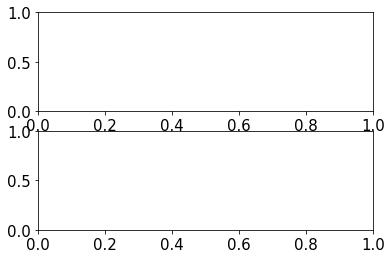

In [21]:
plt.subplots(nrows=2)

(<Figure size 432x288 with 3 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x11c08dda0>,
       dtype=object))

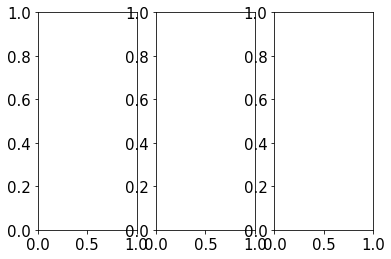

In [22]:
plt.subplots(ncols=3)

You can also specify both, though we won't provide any real examples of doing so beyond the following:

(<Figure size 432x288 with 6 Axes>,
 array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11c0aa940>,
       dtype=object))

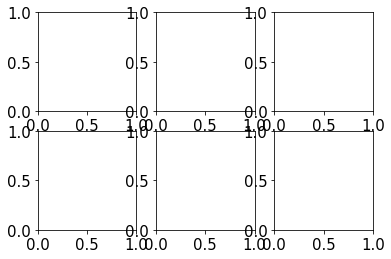

In [23]:
plt.subplots(nrows=2, ncols=3)

Notice that in addition to drawing several axes areas, the method returns a tuple with two entries.  The first entry is a figure object (which we'll ignore), and the second is a collection of axes objects.  Let's peek at each of these.

<class 'matplotlib.figure.Figure'>
<class 'matplotlib.axes._subplots.AxesSubplot'>
<class 'matplotlib.axes._subplots.AxesSubplot'>


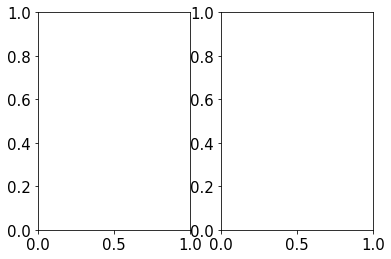

In [24]:
t = plt.subplots(ncols=2)
print(type(t[0]))

ax_list = list(t[1])
for ax in ax_list:
    print(type(ax))

We can plot in each of these individually.

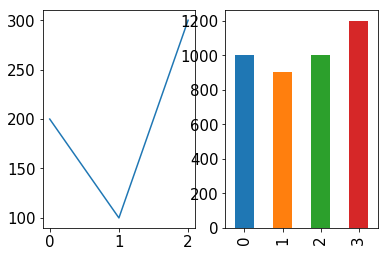

In [32]:
t = plt.subplots(ncols=2)
ax_list = list(t[1])

series1 = Series([200,100,300])
series2 = Series([1000,900,1000,1200])

series1.plot.line(ax=ax_list[0])
series2.plot.bar(ax=ax_list[1])